Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load boundary conditions

In [2]:
def load_bc(path):
    return np.array(pd.read_csv(path, header=None, dtype='float32')).T

In [3]:
box_bc = load_bc('../boundaries/box_boundary_condition.csv')
windmill_bc = load_bc('../boundaries/windmill_boundary_condition.csv')

Plot the heatmap

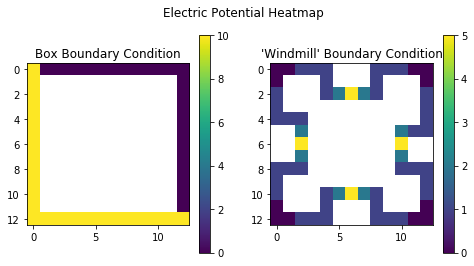

In [4]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
fig.suptitle('Electric Potential Heatmap')

ax[0].set_title('Box Boundary Condition')
box_map = ax[0].imshow(box_bc.T)
ax[0].figure.colorbar(box_map, ax=ax[0])

ax[1].set_title('\'Windmill\' Boundary Condition')
windmill_map = ax[1].imshow(windmill_bc.T)
ax[1].figure.colorbar(windmill_map, ax=ax[1])

plt.show()

MC sampling

In [5]:
def sample_V(X, boundary, save_trajectory=False):
    step_choices = [(0,1), (0,-1), (1,0), (-1,0)]
    if save_trajectory:
        Xt = [X]
    while str(boundary[X[0]][X[1]]) == 'nan':
        X = X + step_choices[np.random.choice(range(4))]
        if save_trajectory:
            Xt.append(X)
    if save_trajectory:
        return boundary[X[0]][X[1]], Xt
    else:
        return boundary[X[0]][X[1]]

In [6]:
Vs = []
Xts = []
X_start = np.array([2,10])
for i in range(50):
    V, Xt = sample_V(X_start, box_bc, True)
    Vs.append(V)
    Xts.append(Xt)
print(np.mean(Vs))

9.6


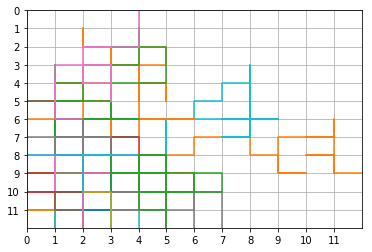

In [7]:
fig, ax = plt.subplots()
plt.xticks(np.arange(0,12,1))
plt.yticks(np.arange(0,12,1))
plt.xlim(0,12)
plt.ylim(12,0)
plt.grid()
for i in range(50):
    ax.plot([X[0] for X in Xts[i]],[X[1] for X in Xts[i]])
plt.show()